<a href="https://colab.research.google.com/github/kaleem500bc/Simple_GAN-MNIST-torch-and-tensorflow/blob/master/Simple_GAN%20torch%20and%20tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement GAN with Tensorflow

In [ ]:
!pip install -q imageio

In [ ]:
import tensorflow as tf

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
(train_dataset,train_labels), (_,_) = tf.keras.datasets.mnist.load_data()

train_dataset_reshape = train_dataset.reshape(train_dataset.shape[0],28,28,1).astype('float32')

train_dataset_normalize = (train_dataset-127.5)/127.5 #range [-1,1]

In [ ]:

train_dataset_shuffled_batched = tf.data.Dataset.from_tensor_slices(train_dataset_normalize).shuffle(60000).batch(256)


In [ ]:
#Generator

def netG():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256,input_shape= (100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Reshape((7,7,256)))

  model.add(layers.Conv2DTranspose(128,(5,5),strides=(1,1), padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1,(5,5),strides=(2,2),padding='same'))
  return model





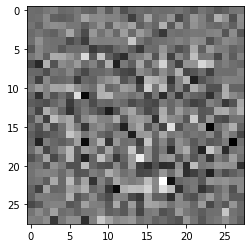

In [ ]:
g_Model = netG()

noise = tf.random.normal([1,100])

generated_image = g_Model(noise, training=False)
plt.imshow(generated_image[0,:,:,0],cmap='gray')


In [ ]:
#Discriminator

def netD():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64,(5,5),strides=(2,2), padding='same', input_shape= [28,28,1]))

  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128,(5,5),strides=(2,2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))
  return model

d_Model = netD()

In [ ]:

criterion = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
#discriminator loss

def d_loss(r_output, f_output):
  r_loss = criterion(tf.ones_like(r_output), r_output)
  f_loss = criterion(tf.zeros_like(f_output),f_output)
  total_loss = r_loss+f_loss
  return total_loss


In [ ]:
#generator loss

def g_loss(f_output):
  loss = criterion(tf.ones_like(f_output), f_output)
  return loss
  

In [ ]:
g_optimizer = tf.keras.optimizers.Adam(1e-4)
d_optimizer = tf.keras.optimizers.Adam(1e-4)



In [ ]:
#training

epochs = 50
noise_dim = 100
num_examples = 16
seed = tf.random.normal([num_examples, noise_dim])


In [ ]:

def training_step(images):
  noise = tf.random.normal([256,noise_dim])
  with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
    g_images = g_Model(noise, training=True)

    r_output =  d_Model(images, training=True)
    f_output = d_Model(g_images,training=True)

    generator_loss = g_loss(f_output)
    disc_loss = d_loss(r_output,f_output)
  
  gradients_generator = g_tape.gradient(generator_loss, g_Model.trainable_variables)
  g_optimizer.apply_gradients(zip(gradients_generator,g_Model.trainable_variables))

  gradients_disc = d_tape.gradient(disc_loss, d_Model.trainable_variables)
  d_optimizer.apply_gradients(zip(gradients_disc, d_Model.trainable_variables))




In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    for image_batch in dataset:
    #   print(image_batch.shape)
    #   break
    # break
      training_step(image_batch)
    
    display.clear_output(wait=True)
    generate_and_save_images(g_Model, epoch+1,seed)
  
  display.clear_output(wait=True)
  generate_and_save_images(g_Model,epochs,seed)

In [ ]:
for i in train_dataset_shuffled_batched:
  print(i.shape
  break

(256, 28, 28)
tf.Tensor(
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.], shape=(28,), dtype=float64)


In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

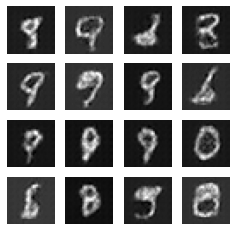

In [ ]:
train(train_dataset_shuffled_batched, 50)

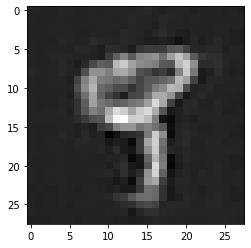

In [ ]:
noise = tf.random.normal([1,100])

generated_image = g_Model(noise, training=False)
plt.imshow(generated_image[0,:,:,0],cmap='gray')

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard()

In [ ]:
%tensorboard --logdir logs

Pytorch GAN

In [ ]:
!pip install torchvision
!pip install torch
!pip install torchviz
!pip install tensorboard

%load_ext tensorboard

     |████████████████████████████████| 51kB 2.2MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=2850c019c091215df96e2e0d833935f60e3a9f18a9d617d6d5d237268924cba1
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [2]:
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets


In [4]:


class netG(nn.Module):
  def __init__(self):
    super().__init__()
    self.f = nn.Linear(100,484)
    self.c1 = nn.ConvTranspose2d(1,256,3)
    self.c2 = nn.ConvTranspose2d(256,64,3)
    self.c5 = nn.ConvTranspose2d(64,1,3)
  def forward(self,x):
    x = self.f(x)
    x = x.view(x.shape[0],1,22,22)
    x = F.leaky_relu(self.c1(x))
    x = F.leaky_relu(self.c2(x))
    x = torch.tanh(self.c5(x))
    return x

generatorM = netG()



In [5]:
# img, _ = dataiter.next()
g_input = torch.randn(64,100)
o = generatorM(g_input)
# print(img.shape)
print(o.shape)

torch.Size([64, 1, 28, 28])


In [6]:
class netD(nn.Module):
  def __init__(self):
    super().__init__()
    self.c1 = nn.Conv2d(1,256,3)
    self.c2 = nn.Conv2d(256,64,3)
    self.c5 = nn.Conv2d(64,1,3)
    self.fl = nn.Flatten()
    # self.f2 = nn.Linear(256,128)
    # self.f3 = nn.Linear(128,64)
    # self.f4 = nn.Linear(64,32)
    # self.f5 = nn.Linear(32,16)
    # self.f6 = nn.Linear(16,8)
    self.f1 = nn.Linear(484,64)
    self.f = nn.Linear(64,1)
  def forward(self,x):
    # x = x.view(x.shape[0],28*28)
    x = self.c1(x)
    x = F.leaky_relu(self.c2(x))
    x = nn.Dropout(0.2)(x)
    x = F.leaky_relu(self.c5(x))
    x = nn.Dropout(0.2)(x)
    # print(x.shape)
    # x = F.leaky_relu(self.c5(x))
    # print(x.shape)
    x = self.fl(x)
    x = F.leaky_relu(self.f1(x))
    x = nn.Dropout(0.4)(x)
    x = F.sigmoid(self.f(x))
    return x

discriminatorM = netD()

In [7]:
criterion = nn.BCELoss()

def totalLossD(realOutput,fakeOutput):
  ones = torch.ones_like(realOutput).to("cuda")
  # print(ones.shape)
  zeros = torch.zeros_like(fakeOutput).to("cuda")
  loss1 = criterion(realOutput,ones)
  loss0 = criterion(fakeOutput,zeros)
  totalLoss = loss1+loss0
  return totalLoss

def totalLossG(fakeOutput):
  ones = torch.ones_like(fakeOutput).to("cuda")
  loss = criterion(fakeOutput,ones)
  return loss

In [8]:

optD = torch.optim.Adam(discriminatorM.parameters())
optG = torch.optim.Adam(generatorM.parameters())


In [9]:
transform = torchvision.transforms.Compose([
                  torchvision.transforms.ToTensor(),
                  torchvision.transforms.Normalize((0.5,),(0.5,))
])
dataset = torchvision.datasets.MNIST('data',train=True,download=True,transform=transform)

datasetBatch = torch.utils.data.DataLoader(dataset,32,shuffle=True)
dataiter = iter(datasetBatch)

In [10]:
generatorM.to("cuda")
discriminatorM.to("cuda")
def training():
  epoch = 50
  plossd = 0
  plossg = 0

  for e in range(epoch):
    for img2,label in datasetBatch:
      img = img2.to("cuda")
      # img = img2
      r_output = discriminatorM(img)
      # print(r_output)

      g_input = torch.randn(64,100).to("cuda")

      f_img = generatorM(g_input) 

      f_output = discriminatorM(f_img.detach())
      # print(f_output)

      optD.zero_grad()
      # print(r_output)
      dloss = totalLossD(r_output,f_output)
      # print(dloss)
      dloss.backward()
      optD.step()
      # print("Discriminator")
      optG.zero_grad()
      g2_input = torch.randn(64,100).to("cuda")
      f2_img = generatorM(g2_input)
      f2_output = discriminatorM(f2_img)
      gloss = totalLossG(f2_output)
      # print(gloss)
      gloss.backward()
      optG.step()
        # print("Generator")
      plossg = plossg+gloss.item()
      plossd = plossd+dloss.item()
    print(e+1)
    print("Generator: "+ str(plossg))
    print("Discriminator: "+ str(plossd))
    plossd = 0
    plossg = 0


In [11]:
training()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1
Generator: 9565.84674963355
Discriminator: 831.2898165021179
2
Generator: 4961.185366630554
Discriminator: 1050.5885439962149
3
Generator: 4758.988908529282
Discriminator: 1095.611652046442
4
Generator: 4498.230062484741
Discriminator: 1131.9090006500483
5
Generator: 4457.807439804077
Discriminator: 1133.0104599893093


KeyboardInterrupt: ignored

In [12]:
input = torch.randn(64,100).to("cuda")
img = generatorM(input)




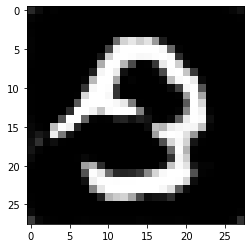

In [13]:
img = img.view(64,28,28).to("cpu")

plt.imshow(img[4].detach().numpy(),cmap='gray')
n=0

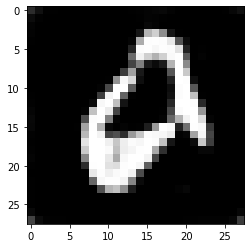

In [20]:
n = n+1
plt.imshow(img[n].detach().numpy(),cmap='gray')